# Pipeline Speed Test

In [11]:
import sys
sys.path.insert(0, '..')
import time

import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
from lib.segmentation import segmentation_adjacency, FormFeatureExtraction
from lib.graph import coarsen_adj, perm_features

def pipeline(image, segmentation_algorithm):
    t_segmentation = time.process_time()
    segmentation = segmentation_algorithm(image)
    t_segmentation = time.process_time() - t_segmentation
    
    t_adjacency = time.process_time()
    adj, points, mass = segmentation_adjacency(segmentation)
    t_adjacency = time.process_time() - t_adjacency
    
    t_coarsen = time.process_time() 
    adjs_dist, adjs_rad, perm = coarsen_adj(adj, points, mass, levels=4)
    t_coarsen = time.process_time() - t_coarsen
    
    t_features = time.process_time()
    features = FormFeatureExtraction(segmentation).get_features()
    features = perm_features(features, perm)
    t_features = time.process_time() - t_features
    
    t_all = t_segmentation + t_adjacency + t_coarsen + t_features
    
    p_segmentation = 100 * t_segmentation / t_all
    p_adjacency = 100 * t_adjacency / t_all
    p_coarsen = 100 * t_coarsen / t_all
    p_features = 100 * t_features / t_all
    
    print('Number of nodes: {}'.format(features.shape[0]))
    print('Execution time: {:.5f}s'.format(t_all))
    print('0. Segmentation: {:.5f}s, {:.2f}%'.format(t_segmentation, p_segmentation))
    print('1. Adjacency generation: {:.5f}s, {:.2f}%'.format(t_adjacency, p_adjacency))
    print('2. Coarsening: {:.5f}s, {:.2f}%'.format(t_coarsen, p_coarsen))
    print('3. Feature extraction: {:.5f}s, {:.2f}%'.format(t_features, p_features))
    
    plt.bar(range(4), [p_segmentation, p_adjacency, p_coarsen, p_features], color="black")
    plt.ylabel('Percentage')

## Load dataset images

In [13]:
from lib.datasets import MNIST, Cifar10, PascalVOC

mnist = MNIST('../data/mnist').test.next_batch(1, shuffle=False)[0][0]
cifar_10 = Cifar10('../data/cifar_10').test.next_batch(2, shuffle=False)[0][1]
pascal_voc = PascalVOC('../test_data').test.next_batch(3, shuffle=False)[0][2]

Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz


In [14]:
from lib.segmentation import slic_fixed, quickshift_fixed

## MNIST SLIC

Number of nodes: 80
Execution time: 0.01691s
0. Segmentation: 0.00442s, 26.14%
1. Adjacency generation: 0.00057s, 3.36%
2. Coarsening: 0.00976s, 57.71%
3. Feature extraction: 0.00214s, 12.66%
4. Feature permutation: 0.00002s, 0.13%


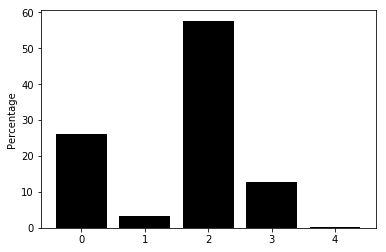

In [15]:
slic = slic_fixed(num_segments=100, compactness=5, max_iterations=10, sigma=0)
pipeline(mnist, slic)

## MNIST Quickshift

Number of nodes: 96
Execution time: 0.01857s
0. Segmentation: 0.00458s, 24.65%
1. Adjacency generation: 0.00057s, 3.06%
2. Coarsening: 0.01103s, 59.41%
3. Feature extraction: 0.00237s, 12.74%
4. Feature permutation: 0.00003s, 0.13%


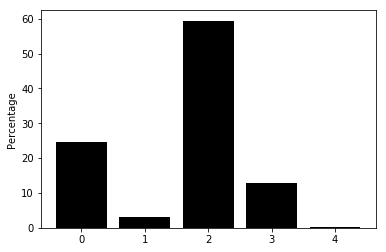

In [16]:
quickshift = quickshift_fixed(ratio=1, kernel_size=2, max_dist=2, sigma=0)
pipeline(mnist, quickshift)

## Cifar10 SLIC

Number of nodes: 160
Execution time: 0.02022s
0. Segmentation: 0.00369s, 18.26%
1. Adjacency generation: 0.00070s, 3.47%
2. Coarsening: 0.01319s, 65.25%
3. Feature extraction: 0.00260s, 12.87%
4. Feature permutation: 0.00003s, 0.14%


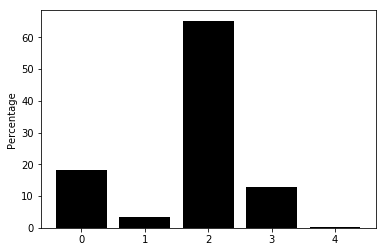

In [17]:
slic = slic_fixed(num_segments=200, compactness=5, max_iterations=10, sigma=0)
pipeline(cifar_10, slic)

## Cifar10 Quickshift

Number of nodes: 208
Execution time: 0.02180s
0. Segmentation: 0.00345s, 15.84%
1. Adjacency generation: 0.00081s, 3.72%
2. Coarsening: 0.01449s, 66.48%
3. Feature extraction: 0.00301s, 13.82%
4. Feature permutation: 0.00003s, 0.14%


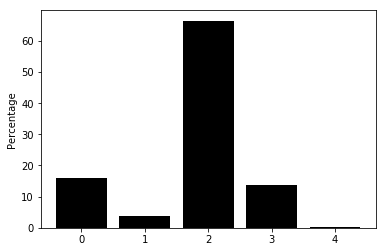

In [18]:
quickshift = quickshift_fixed(ratio=1, kernel_size=1, max_dist=5, sigma=0)
pipeline(cifar_10, quickshift)

## PascalVOC SLIC

Number of nodes: 1872
Execution time: 0.37819s
0. Segmentation: 0.24682s, 65.26%
1. Adjacency generation: 0.02492s, 6.59%
2. Coarsening: 0.06059s, 16.02%
3. Feature extraction: 0.04467s, 11.81%
4. Feature permutation: 0.00119s, 0.32%


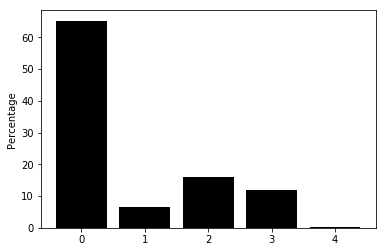

In [19]:
slic = slic_fixed(num_segments=1600, compactness=30, max_iterations=10, sigma=0)
pipeline(pascal_voc, slic)

## PascalVOC Quickshift

Number of nodes: 2048
Execution time: 0.78697s
0. Segmentation: 0.61073s, 77.61%
1. Adjacency generation: 0.04178s, 5.31%
2. Coarsening: 0.08720s, 11.08%
3. Feature extraction: 0.04646s, 5.90%
4. Feature permutation: 0.00080s, 0.10%


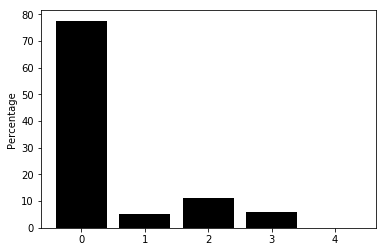

In [20]:
quickshift = quickshift_fixed(ratio=0.75, kernel_size=2, max_dist=8, sigma=0)
pipeline(pascal_voc, quickshift)